In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
print(os.getcwd())

c:\Users\user\Desktop\KIFIYA Projects\TellCo-Week-02\notebooks


In [2]:
# Load environment variables from the .env file
load_dotenv()
 # Retrieve the environment variables 
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
# # Construct the connection string
connection_string = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
# Create the engine
engine = create_engine(connection_string)

In [ ]:
query = """
SELECT "MSISDN/Number" AS user,
"Bearer Id", "Dur. (ms)",
"Total DL (Bytes)", "Total UL (Bytes)",
"Social Media DL (Bytes)", "Google DL (Bytes)",
"Email DL (Bytes)", "Youtube DL (Bytes)", "Netflix DL (Bytes)",
"Gaming DL (Bytes)", "Other DL (Bytes)" FROM xdr_data; """
data = pd.read_sql_query(query, engine)

print(data)

                user     Bearer Id  Dur. (ms)  Total DL (Bytes)  \
0       3.366496e+10  1.311448e+19  1823652.0       308879636.0   
1       3.368185e+10  1.311448e+19  1365104.0       653384965.0   
2       3.376063e+10  1.311448e+19  1361762.0       279807335.0   
3       3.375034e+10  1.311448e+19  1321509.0       846028530.0   
4       3.369980e+10  1.311448e+19  1089009.0       569138589.0   
...              ...           ...        ...               ...   
149996  3.365069e+10  7.277826e+18    81230.0       574175259.0   
149997  3.366345e+10  7.349883e+18    97970.0       666648844.0   
149998  3.362189e+10  1.311448e+19    98249.0       592786405.0   
149999  3.361962e+10  1.311448e+19    97910.0       371895920.0   
150000           NaN           NaN        NaN               NaN   

        Total UL (Bytes)  Social Media DL (Bytes)  Google DL (Bytes)  \
0             36749741.0             1.545765e+06       1.634479e+06   
1             53800391.0             1.926113e+06  

In [13]:
from aggr_metrics import aggregate_metrics

aggregate_data= aggregate_metrics(data)
aggregate_data

,session_frequency,total_duration,total_download,total_upload
user,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0
3.360100e+10,1,134969.0,5.566597e+08,39306820.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0
...,...,...,...,...
3.379000e+10,1,8810.0,6.879252e+08,26716429.0
3.379000e+10,1,140988.0,4.445751e+08,35732243.0
3.197021e+12,1,877385.0,1.948281e+08,37295915.0


In [ ]:
#Report top 10 customers per engagement metric

from engagement_analysiss import top_customers

top_customers_data = top_customers(aggregate_data)

print("Top 10 Customers by Session Frequency:\n", top_customers_data['frequency'])
print("Top 10 Customers by Total Duration:\n", top_customers_data['duration'])
print("Top 10 Customers by Total Download:\n", top_customers_data['download'])
print("Top 10 Customers by Total Upload:\n", top_customers_data['upload'])

Top 10 Customers by Session Frequency:
               session_frequency  total_duration  total_download  total_upload
user                                                                         
3.362632e+10                 18       8791927.0    7.301517e+09   669650721.0
3.361489e+10                 17       9966898.0    8.156743e+09   689483001.0
3.362578e+10                 17      18553754.0    7.770043e+09   729577380.0
3.365973e+10                 16       4035428.0    7.081602e+09   624260321.0
3.367588e+10                 15       4865947.0    7.309542e+09   581568792.0
3.376054e+10                 15       9279434.0    7.811295e+09   703478581.0
3.366716e+10                 13       8744914.0    5.052068e+09   566326364.0
3.360313e+10                 12       6287761.0    4.540607e+09   435587631.0
3.360452e+10                 12       5207990.0    5.096079e+09   391775856.0
3.362708e+10                 12       4703516.0    5.309479e+09   445251947.0
Top 10 Customers by Tota

In [26]:
# Normalize engagement metrics and run K-Means clustering
from engagement_analysiss import normalize_and_cluster

aggregated_data, scaler, kmeans = normalize_and_cluster(aggregate_data)

In [27]:
# Compute Statistics for each cluster
from engagement_analysiss import compute_cluster_stats
cluster_stats = compute_cluster_stats(aggregated_data)
cluster_stats

session_frequency                      total_duration              \
                      min max      mean    sum            min         max   
cluster                                                                     
0                       2  18  4.401675  16295        66594.0  18553754.0   
1                       0   2  1.005868  79020         7142.0   1042254.0   
2                       1   4  2.162675  53191        18235.0   1573420.0   

                                     total_download                \
                  mean           sum            min           max   
cluster                                                             
0        635561.260670  2.352848e+09    404647470.0  8.156743e+09   
1        103260.247623  8.112022e+09      8827082.0  1.322450e+09   
2        209553.489571  5.153968e+09     65270746.0  2.409217e+09   

                                    total_upload                             \
                 mean           sum          min          max          mean   
cluster                                                                       
0        2.068793e+09  7.658671e+12   68496905.0  729577380.0  1.827919e+08   
1        4.549788e+08  3.574268e+13    2866892.0  104650587.0  4.134921e+07   
2        9.883407e+08  2.430824e+13   23034394.0  197644172.0  8.940058e+07   

                       
                  sum  
cluster                
0        6.766955e+11  
1        3.248353e+12  
2        2.198807e+12

In [29]:
# Aggregate user total traffic per application
from engagement_analysiss import user_traffic_per_app
application_data = user_traffic_per_app(data)
application_data

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes)
user,,,,,,,
3.360100e+10,2206504.0,3337123.0,837400.0,14900201.0,10265105.0,8.110911e+08,377096990.0
3.360100e+10,2598548.0,4197697.0,2828821.0,5324251.0,770569.0,1.050353e+08,279557701.0
3.360100e+10,3148004.0,3343483.0,2436500.0,2137272.0,16525919.0,5.290685e+08,495086501.0
3.360101e+10,251469.0,5937765.0,2178618.0,4393123.0,1157362.0,3.880748e+08,25248001.0
3.360101e+10,2861230.0,13728668.0,2247808.0,10339971.0,24971647.0,1.308981e+09,777643713.0
...,...,...,...,...,...,...,...
3.379000e+10,234320.0,6834178.0,480946.0,8294310.0,14754741.0,6.573267e+08,291391283.0
3.379000e+10,442214.0,1472406.0,2513433.0,5596862.0,6929961.0,4.276202e+08,204636073.0
3.197021e+12,668596.0,8572779.0,842279.0,9839889.0,10340908.0,1.645636e+08,467678100.0


In [31]:
# Derive the top 10 most engaged users per application
from engagement_analysiss import top_users_per_application
top_users_per_app = top_users_per_application(application_data)
top_users_per_app

{'Social Media DL (Bytes)':               Social Media DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  \
 user                                                                         
 3.362632e+10               42743837.0        116106455.0        33404785.0   
 3.376054e+10               39297646.0         88626532.0        26437895.0   
 3.365973e+10               34900444.0         90958549.0        29907647.0   
 3.361489e+10               27749744.0         93941708.0        33607211.0   
 3.362578e+10               26564121.0        107904739.0        31895412.0   
 3.366716e+10               23753753.0         71707826.0        23276752.0   
 3.378632e+10               23568655.0         78819810.0        30876908.0   
 3.366907e+10               23477047.0         54915216.0        17813584.0   
 3.360313e+10               22776679.0         73942055.0        20343728.0   
 3.365849e+10               22695673.0         55457602.0        15004556.0   
 
               Youtube 

In [ ]:
# Plot the top 3 most used applications
from engagement_analysiss import plot_top_apps
plot_top_apps(application_data)

In [45]:
# Determine the optimized value of k using the elbow method
from engagement_analysiss import elbow_method
features_for_scaling = ['session_frequency', 'total_duration', 'total_download', 'total_upload']

In [46]:
features_data = aggregated_data[features_for_scaling]

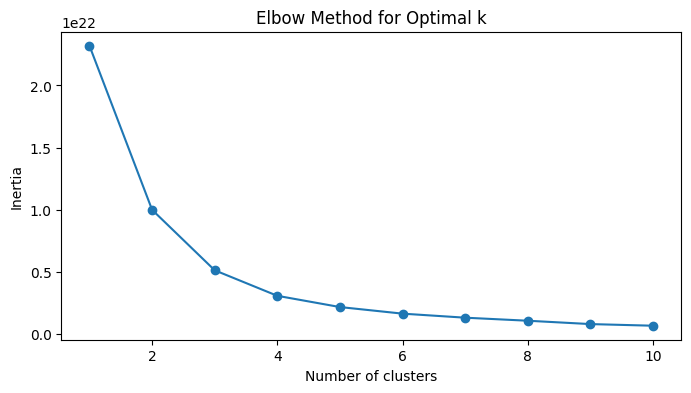

The optimal number of clusters is 3


In [49]:
from engagement_analysiss import elbow_method
inertia = elbow_method(features_data, max_k=10)

optimal_k = 3 # Based on the elbow plot
print(f"The optimal number of clusters is {optimal_k}")

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import engagement_analysiss
aggregated_data, scaler, kmeans = normalize_and_cluster(aggregated_data, n_clusters=optimal_k)

In [ ]:
import engagement_analysiss
cluster_stats = compute_cluster_stats(aggregated_data)
cluster_stats

session_frequency                      total_duration              \
                      min max      mean    sum            min         max   
cluster                                                                     
0                       2  18  4.401675  16295        66594.0  18553754.0   
1                       0   2  1.005868  79020         7142.0   1042254.0   
2                       1   4  2.162675  53191        18235.0   1573420.0   

                                     total_download                \
                  mean           sum            min           max   
cluster                                                             
0        635561.260670  2.352848e+09    404647470.0  8.156743e+09   
1        103260.247623  8.112022e+09      8827082.0  1.322450e+09   
2        209553.489571  5.153968e+09     65270746.0  2.409217e+09   

                                    total_upload                             \
                 mean           sum          min          max          mean   
cluster                                                                       
0        2.068793e+09  7.658671e+12   68496905.0  729577380.0  1.827919e+08   
1        4.549788e+08  3.574268e+13    2866892.0  104650587.0  4.134921e+07   
2        9.883407e+08  2.430824e+13   23034394.0  197644172.0  8.940058e+07   

                       
                  sum  
cluster                
0        6.766955e+11  
1        3.248353e+12  
2        2.198807e+12